Import Libraries

In [ ]:
#import libraries

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras



Load Data

In [ ]:
(X_train, y_train), (X_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
# Print the shape of data

In [ ]:
X_train.shape,y_train.shape, "***************" , X_test.shape,y_test.shape

((60000, 28, 28), (60000,), '***************', (10000, 28, 28), (10000,))

In [ ]:
y_train[200]

8

In [ ]:
class_labels = [	"T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt",	"Sneaker",	"Bag",	"Ankle boot"]

In [ ]:
class_labels


['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# showing image

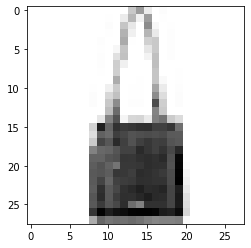

In [ ]:
plt.imshow(X_train[200],cmap='Greys')

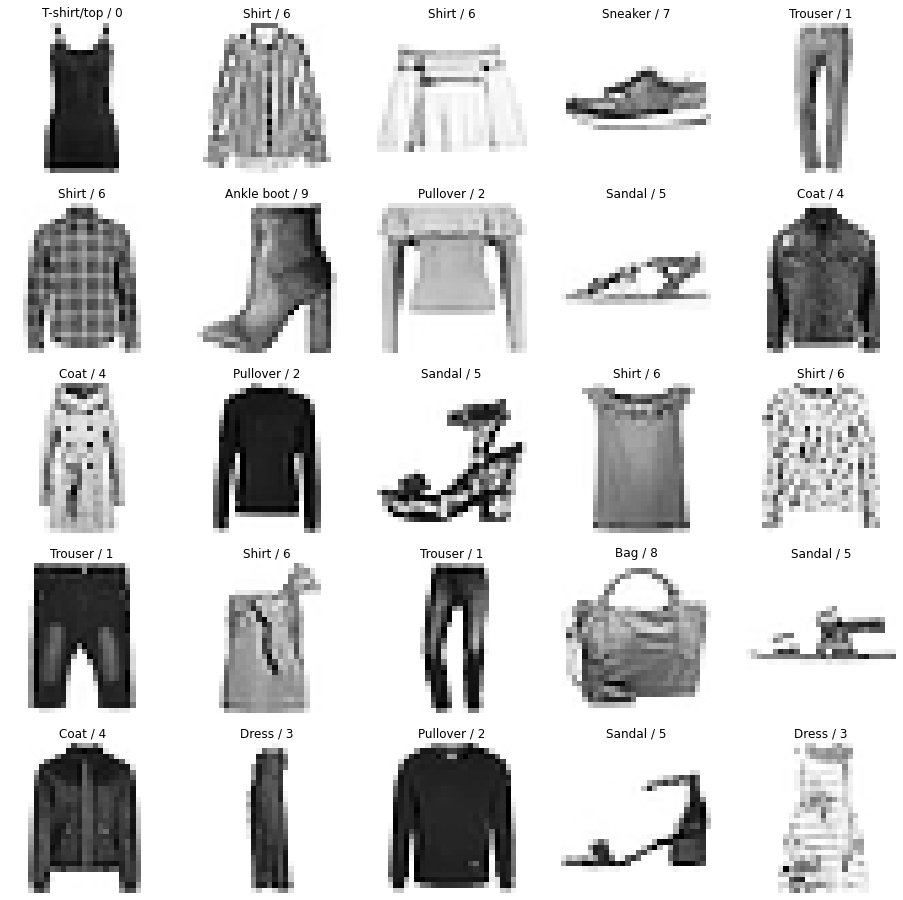

In [ ]:
plt.figure(figsize=(16,16))

j=1
for  i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(X_train[i],cmap='Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

In [ ]:
X_train.ndim

3

In [ ]:
X_train = np.expand_dims(X_train,-1)

In [ ]:
X_train.ndim

4

In [ ]:
X_test=np.expand_dims(X_test,-1)

In [ ]:
# feature scaling 

In [ ]:
X_train = X_train/255
X_test= X_test/255

In [ ]:
# Split dataset

In [ ]:
from sklearn.model_selection import  train_test_split
X_train,X_Validation,y_train,y_Validation=train_test_split(X_train,y_train,test_size=0.2,random_state=2020)
X_train.shape,X_Validation.shape,y_train.shape,y_Validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

Build **CNN** model

In [ ]:
# Construct simple CNN model 

In [ ]:
model=keras.models.Sequential([
                         keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dense(units=10,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_Validation,y_Validation))

Epoch 1/10
94/94 [==============================] - 23s 225ms/step - loss: 0.6338 - accuracy: 0.7922 - val_loss: 0.4314 - val_accuracy: 0.8508
Epoch 2/10
94/94 [==============================] - 22s 236ms/step - loss: 0.3788 - accuracy: 0.8662 - val_loss: 0.3813 - val_accuracy: 0.8627
Epoch 3/10
94/94 [==============================] - 21s 223ms/step - loss: 0.3290 - accuracy: 0.8837 - val_loss: 0.3272 - val_accuracy: 0.8852
Epoch 4/10
94/94 [==============================] - 23s 242ms/step - loss: 0.2953 - accuracy: 0.8956 - val_loss: 0.3266 - val_accuracy: 0.8851
Epoch 5/10
94/94 [==============================] - 21s 223ms/step - loss: 0.2832 - accuracy: 0.8988 - val_loss: 0.2983 - val_accuracy: 0.8946
Epoch 6/10
94/94 [==============================] - 25s 262ms/step - loss: 0.2602 - accuracy: 0.9078 - val_loss: 0.2942 - val_accuracy: 0.8951
Epoch 7/10
94/94 [==============================] - 21s 223ms/step - loss: 0.2450 - accuracy: 0.9127 - val_loss: 0.2932 - val_accuracy: 0.8969

In [ ]:
y_pred = model.predict(X_test)
y_pred.round(2)

313/313 [==============================] - 3s 8ms/step


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.2761 - accuracy: 0.9000


[0.2761099636554718, 0.8999999761581421]

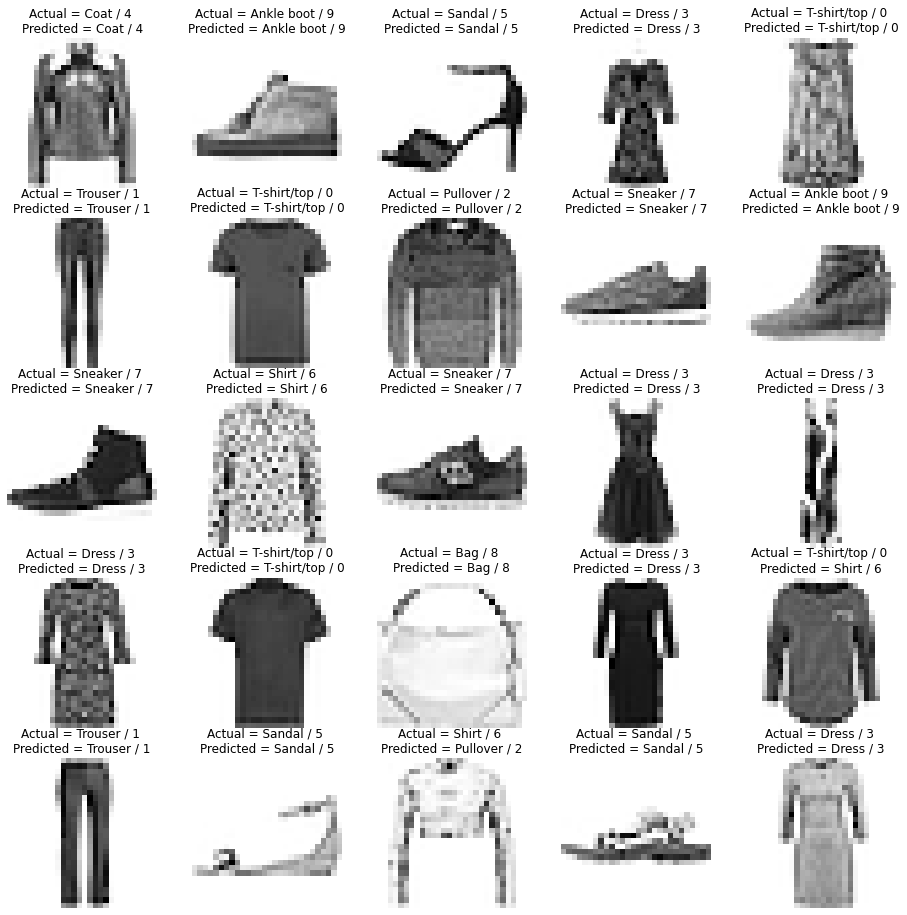

In [ ]:
plt.figure(figsize=(16,16))
 
j=1
for i in np.random.randint(0, 1000,25):
  plt.subplot(5,5, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

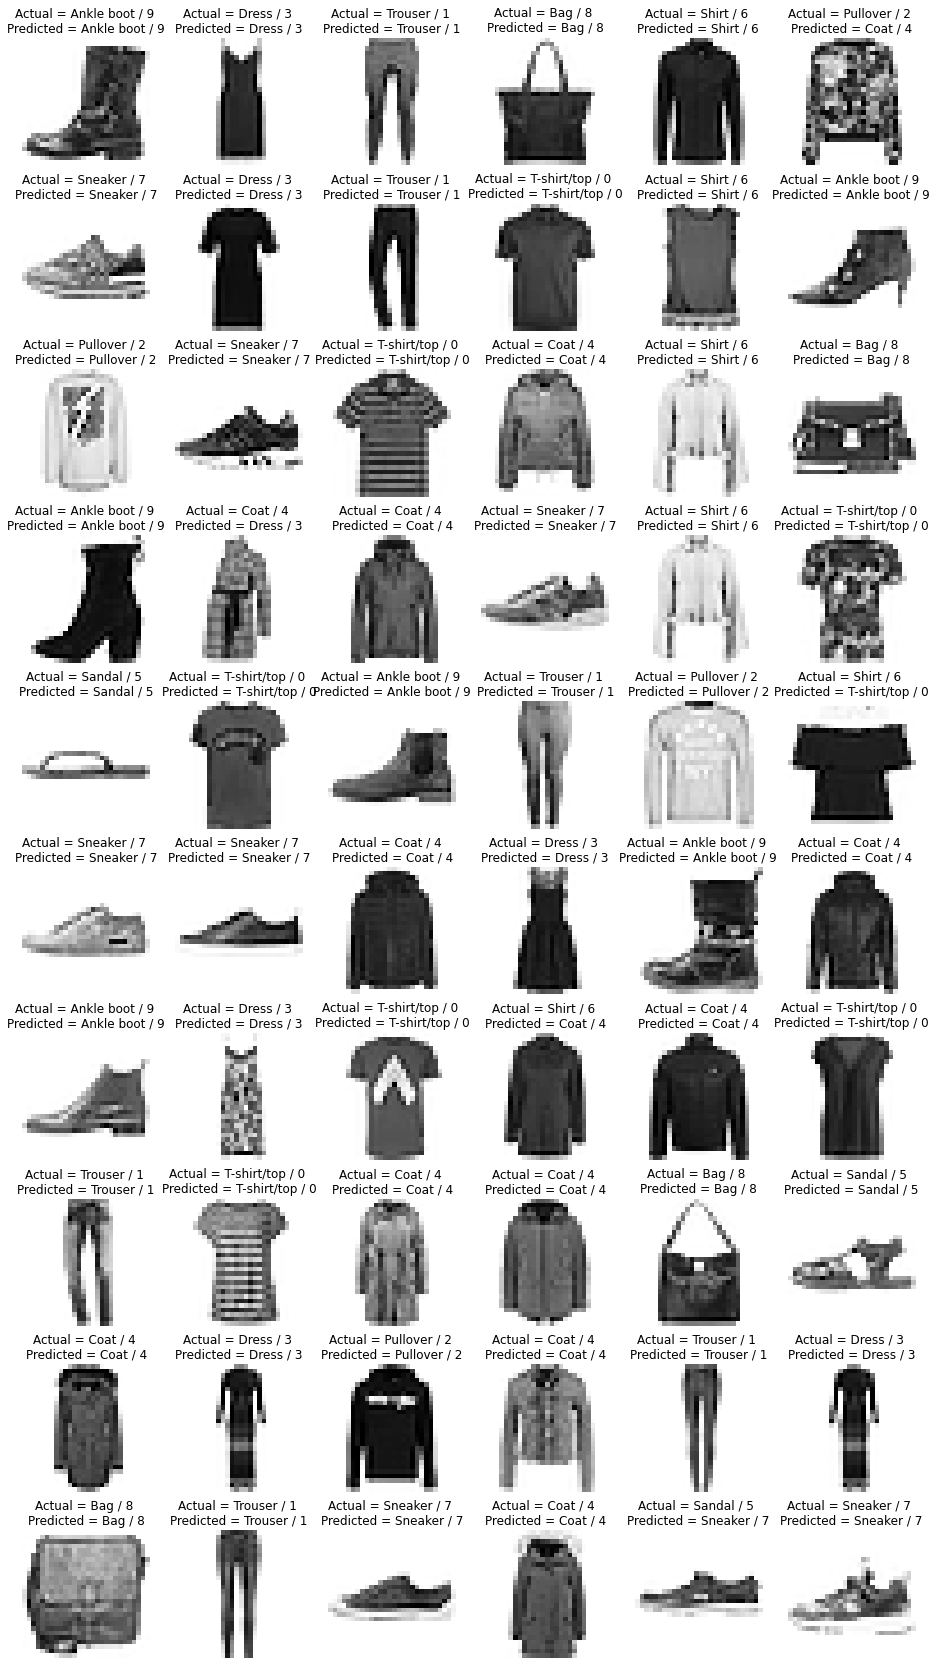

In [ ]:
plt.figure(figsize=(16,30))
 
j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

In [ ]:
"""## Confusion Matrix"""

'## Confusion Matrix'

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

<Figure size 1152x648 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.87      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.83      0.85      0.84      1000
       Dress       0.89      0.92      0.90      1000
        Coat       0.86      0.84      0.85      1000
      Sandal       0.96      0.98      0.97      1000
       Shirt       0.76      0.67      0.71      1000
     Sneaker       0.96      0.94      0.95      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.95      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



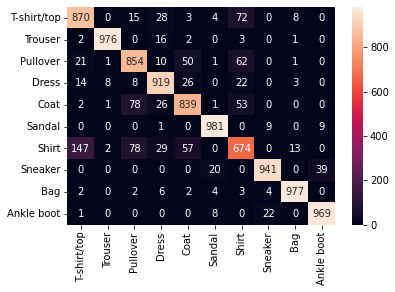

In [ ]:
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)
 
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

In [ ]:
"""# Save Model"""
model.save('fashion_mnist_cnn_model.h5')

In [ ]:
t = plt.imread('/trouser.webp')

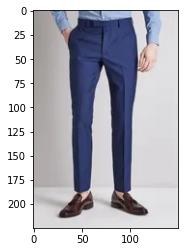

In [ ]:
plt.imshow(t)


In [ ]:
# Resize the input image to reduce the pixel into 28,28. Because we trained our CNN model with 28,28 pixel only

In [ ]:
from skimage import transform

In [ ]:
resize = transform.resize(t,(28,28,3))

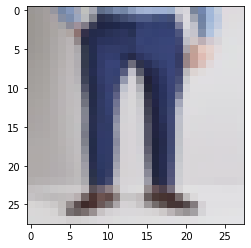

In [ ]:
img = plt.imshow(resize)

In [ ]:
x_pred=np.array([resize])
x_pred

array([[[[0.60784314, 0.59215686, 0.58465136],
         [0.62170868, 0.60602241, 0.6       ],
         [0.64271709, 0.62310924, 0.61918768],
         ...,
         [0.8745098 , 0.85098039, 0.8745098 ],
         [0.87058824, 0.85490196, 0.87058824],
         [0.87058824, 0.85882353, 0.87058824]],

        [[0.60784314, 0.59215686, 0.575     ],
         [0.62170868, 0.60602241, 0.59507053],
         [0.64663866, 0.62310924, 0.61918768],
         ...,
         [0.8710084 , 0.85532213, 0.87252651],
         [0.87268908, 0.8627451 , 0.86666667],
         [0.87058824, 0.8627451 , 0.87058824]],

        [[0.60784314, 0.59215686, 0.57647059],
         [0.62170868, 0.60602241, 0.59243697],
         [0.64271709, 0.62310924, 0.61134454],
         ...,
         [0.86666667, 0.86130702, 0.8780112 ],
         [0.87058824, 0.86666667, 0.87058824],
         [0.87248649, 0.86666667, 0.87843137]],

        ...,

        [[0.84404762, 0.83620448, 0.83298319],
         [0.83459384, 0.82514006, 0.8267507 ]

In [ ]:
resize

array([[[0.60784314, 0.59215686, 0.58465136],
        [0.62170868, 0.60602241, 0.6       ],
        [0.64271709, 0.62310924, 0.61918768],
        ...,
        [0.8745098 , 0.85098039, 0.8745098 ],
        [0.87058824, 0.85490196, 0.87058824],
        [0.87058824, 0.85882353, 0.87058824]],

       [[0.60784314, 0.59215686, 0.575     ],
        [0.62170868, 0.60602241, 0.59507053],
        [0.64663866, 0.62310924, 0.61918768],
        ...,
        [0.8710084 , 0.85532213, 0.87252651],
        [0.87268908, 0.8627451 , 0.86666667],
        [0.87058824, 0.8627451 , 0.87058824]],

       [[0.60784314, 0.59215686, 0.57647059],
        [0.62170868, 0.60602241, 0.59243697],
        [0.64271709, 0.62310924, 0.61134454],
        ...,
        [0.86666667, 0.86130702, 0.8780112 ],
        [0.87058824, 0.86666667, 0.87058824],
        [0.87248649, 0.86666667, 0.87843137]],

       ...,

       [[0.84404762, 0.83620448, 0.83298319],
        [0.83459384, 0.82514006, 0.8267507 ],
        [0.81932773, 0

In [ ]:
prediction=model.predict(x_pred)

UnimplementedError: ignored